<a href="https://colab.research.google.com/github/rohitkhadka1/SocialHoneyPotAnalyzer/blob/main/Twitter_User_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#import necessary libraries
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
df_polluters_tweets = pd.read_csv("/content/drive/MyDrive/social_honeypot_icwsm_2011/content_polluters_tweets.txt",
                  sep = "\t",
                  header = None,
                  names = ['UserID', 'TweetID', 'Tweet', 'CreatedAt'])

In [ ]:
df_polluters_tweets['Tweet'][0]

'MELBOURNE ENQUIRY: Seeking a variety of acts for our end of year show. Payment is $120 per slot or $200 for 2.... http://bit.ly/4Ah3fF'

In [ ]:
df_polluters_tweets["UserID"].nunique()

20645

In [ ]:
print(df_polluters_tweets.shape)
df_polluters_tweets.head()

(2333691, 4)


,UserID,TweetID,Tweet,CreatedAt
0,6301,5599519501,MELBOURNE ENQUIRY: Seeking a variety of acts f...,2009-11-10 15:14:31
1,6301,5600313663,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,2009-11-10 15:46:05
2,6301,5600328557,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,2009-11-10 15:46:40
3,6301,5600338093,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,2009-11-10 15:47:03
4,6301,5600564863,"Come to ""The Burlesque Bootcamp - Sydney"" Satu...",2009-11-10 15:56:03


In [18]:
df_polluters_tweets.isnull().sum()

,0
UserID,0
TweetID,0
Tweet,5
CreatedAt,0


In [19]:
# Drop the null values
df_polluters_tweets.dropna(inplace = True)
print(df_polluters_tweets.isnull().sum())
df_polluters_tweets.shape

UserID       0
TweetID      0
Tweet        0
CreatedAt    0
dtype: int64


(2333686, 4)

In [ ]:
# df_polluters_tweets_grouped = df_polluters_tweets.groupby("UserID")["Tweet"].apply(list).reset_index()
# df_polluters_tweets_grouped["Tweet"][0]

In [5]:
df_polluter_users = pd.read_csv("/content/drive/MyDrive/social_honeypot_icwsm_2011/content_polluters.txt",
                  sep = "\t",
                  names = ['UserID', "Created at", "Collected at", "Number of followings", "Number of followers", "Number of Tweets", "Length of Screen Name", "LengthOfDescriptionInUserProfile"],
                  header = None)
df_polluter_users['UserType'] = "Polluter"

In [ ]:
print(df_polluter_users.shape)
df_polluter_users.head()

(22223, 9)


,UserID,Created at,Collected at,Number of followings,Number of followers,Number of Tweets,Length of Screen Name,LengthOfDescriptionInUserProfile,UserType
0,6301,2006-09-18 01:07:50,2010-01-17 20:38:25,3269,3071,861,8,132,Polluter
1,10836,2006-10-27 14:38:04,2010-06-18 03:35:34,1949,793,226,9,134,Polluter
2,10997,2006-10-29 09:50:38,2010-04-24 01:12:40,1119,9644,38674,12,158,Polluter
3,633293,2007-01-14 12:40:10,2010-01-24 11:59:38,2174,6029,12718,11,121,Polluter
4,717883,2007-01-27 22:14:18,2010-02-06 06:25:58,7731,7029,873,6,70,Polluter


In [ ]:
df_polluter_users.isnull().sum()

,0
UserID,0
Created at,0
Collected at,0
Number of followings,0
Number of followers,0
Number of Tweets,0
Length of Screen Name,0
LengthOfDescriptionInUserProfile,0
UserType,0


In [ ]:
df_polluter_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   UserID                            22223 non-null  int64 
 1   Created at                        22223 non-null  object
 2   Collected at                      22223 non-null  object
 3   Number of followings              22223 non-null  int64 
 4   Number of followers               22223 non-null  int64 
 5   Number of Tweets                  22223 non-null  int64 
 6   Length of Screen Name             22223 non-null  int64 
 7   LengthOfDescriptionInUserProfile  22223 non-null  int64 
 8   UserType                          22223 non-null  object
dtypes: int64(6), object(3)
memory usage: 1.5+ MB


In [ ]:
df_polluter_users = df_polluter_users[df_polluter_users['UserID'].isin(polluteruserIDlist)]
df_polluter_users.shape

(20645, 9)

In [ ]:
df_polluter_following = pd.read_csv("/content/drive/MyDrive/social_honeypot_icwsm_2011/content_polluters_followings.txt",
                  sep = "\t",
                  header = None,
                  names = ["UserID", "Series of number of Following"])

In [ ]:
print(df_polluter_following.shape)

df_polluter_following.head()

(22223, 2)


,UserID,Series of number of Following
0,6301,"3269,3310,3339,3381,3351,3323,3305,3275,3245,3..."
1,10836,"1949,1963,1963,1963,1963,1963,1963,1962,1961,1..."
2,10997,"1119,1119,999,999,1050,1170,1071,799,799,799,8..."
3,633293,"2174,2651,2676,2674,2673,2673,2673,2672,2672,2..."
4,717883,"7731,7737,7737,7741,7741,7741,7740,7740,7749,7..."


In [ ]:
df_polluter_following = df_polluter_following[df_polluter_following['UserID'].isin(polluteruserIDlist)]
df_polluter_following.shape

(20645, 2)

Legitimate Users

In [ ]:
df_legitimate_tweets = pd.read_csv("/content/drive/MyDrive/social_honeypot_icwsm_2011/legitimate_users_tweets.txt",
                  sep = "\t",
                  header = None,
                  names = ['UserID', 'TweetID', 'Tweet', 'CreatedAt'])
df_legitimate_tweets.head()

,UserID,TweetID,Tweet,CreatedAt
0,614,5912305459,… at house party in Daybreak. Not as weird as ...,2009-11-20 23:52:52
1,614,5908467165,Taxiing — at SLC Salt Lake City International...,2009-11-20 20:42:48
2,614,5904901963,Almost home! — at PDX Portland International ...,2009-11-20 18:11:01
3,614,5900351610,Lunch! — at Ten01 http://gowal.la/s/Awa,2009-11-20 15:04:42
4,614,5900312627,Mm … books — at @Powells http://gowal.la/s/6fe,2009-11-20 15:03:06


In [ ]:
df_legitimate_tweets_grouped = df_legitimate_tweets.groupby("UserID")["Tweet"].apply(list).reset_index()
df_legitimate_tweets_grouped.shape

(19251, 2)

In [ ]:
df_legitimate_tweets_grouped.head()

,UserID,Tweet
0,614,[… at house party in Daybreak. Not as weird as...
1,1038,[@dialupkid Mijn vriendin en ik hebben een gez...
2,1437,[Looks like the #Bengals are going with Larry ...
3,2615,"[@tobi Congrats on impending fatherhood!, @Coc..."
4,3148,[New! Seesmic for Blackberry http://bit.ly/7a8...


In [ ]:
df_legitimate_users = pd.read_csv("/content/drive/MyDrive/social_honeypot_icwsm_2011/legitimate_users.txt",
                  sep ="\t",
                  header = None,
                  names = ["UserID", "Created at", "Collected at", "Number of followings", "Number of followers", "Number of Tweets", "Length of Screen Name", "LengthOfDescriptionInUserProfile"])

df_legitimate_users['UserType'] = "Legitimate"

In [ ]:
print(df_legitimate_users.shape)
df_legitimate_users.head()

(19276, 9)


,UserID,Created at,Collected at,Number of followings,Number of followers,Number of Tweets,Length of Screen Name,LengthOfDescriptionInUserProfile,UserType
0,614,2006-07-13 15:30:05,2009-11-20 23:56:21,510,350,3265,10,34,Legitimate
1,1038,2006-07-15 16:12:15,2009-11-16 05:12:11,304,443,4405,7,156,Legitimate
2,1437,2006-07-16 12:29:24,2009-11-16 16:25:12,45,73,725,6,37,Legitimate
3,2615,2006-07-19 23:23:55,2009-11-27 18:34:36,211,230,211,7,0,Legitimate
4,3148,2006-07-26 14:17:22,2009-11-20 17:35:18,7346,7244,11438,8,97,Legitimate


In [ ]:
df_legitimate_users = df_legitimate_users[df_legitimate_users['UserID'].isin(df_legitimate_tweets_grouped['UserID'].values)]
df_legitimate_users.shape

(19251, 9)

In [ ]:
df_legitimate_following = pd.read_csv("/content/drive/MyDrive/social_honeypot_icwsm_2011/legitimate_users_followings.txt",
                  sep = "\t",
                  header = None,
                  names = ["UserID", "Series of number of Following"])

In [ ]:
print(df_legitimate_following.shape)
df_legitimate_following.head()

(19276, 2)


,UserID,Series of number of Following
0,614,"664,664,664,665,665,665,665,665,665,665,665,66..."
1,1038,"378,378,378,378,378,378,378,378,378,378,378,37..."
2,1437,"59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,5..."
3,2615,"262,262,262,262,262,262,262,262,262,262,264,26..."
4,3148,"5238,5238,5238,5238,5238,5238,5238,5238,5238,5..."


In [ ]:
df_legitimate_following = df_legitimate_following[df_legitimate_following['UserID'].isin(df_legitimate_users['UserID'].values)]
df_legitimate_following.shape

(19251, 2)

In [ ]:
df_polluters = df_polluters_tweets_grouped.merge(df_polluter_users, on = "UserID", how = "inner")
df_polluters = df_polluters.merge(df_polluter_following, on = "UserID", how = "inner")
df_polluters.head()

,UserID,Tweet,Created at,Collected at,Number of followings,Number of followers,Number of Tweets,Length of Screen Name,LengthOfDescriptionInUserProfile,UserType,Series of number of Following
0,6301,[MELBOURNE ENQUIRY: Seeking a variety of acts ...,2006-09-18 01:07:50,2010-01-17 20:38:25,3269,3071,861,8,132,Polluter,"3269,3310,3339,3381,3351,3323,3305,3275,3245,3..."
1,10836,"[http://www.cslingphotography.com/wild/, I am ...",2006-10-27 14:38:04,2010-06-18 03:35:34,1949,793,226,9,134,Polluter,"1949,1963,1963,1963,1963,1963,1963,1962,1961,1..."
2,10997,[just past beeston. tempted to go load prepai...,2006-10-29 09:50:38,2010-04-24 01:12:40,1119,9644,38674,12,158,Polluter,"1119,1119,999,999,1050,1170,1071,799,799,799,8..."
3,633293,[Trip to Home Depot ... gotta get a couple thi...,2007-01-14 12:40:10,2010-01-24 11:59:38,2174,6029,12718,11,121,Polluter,"2174,2651,2676,2674,2673,2673,2673,2672,2672,2..."
4,717883,"[What track are you listening to right now?, D...",2007-01-27 22:14:18,2010-02-06 06:25:58,7731,7029,873,6,70,Polluter,"7731,7737,7737,7741,7741,7741,7740,7740,7749,7..."


In [ ]:
df_polluters.shape

(20645, 11)

In [ ]:
df_polluters["Created at"] = pd.to_datetime(df_polluters["Created at"])
df_polluters["Collected at"] = pd.to_datetime(df_polluters["Collected at"])
df_polluters["Account Age"] = df_polluters["Collected at"] - df_polluters["Created at"]
# In days
df_polluters["Account Age"] = df_polluters["Account Age"].dt.days
df_polluters.head()


,UserID,Tweet,Created at,Collected at,Number of followings,Number of followers,Number of Tweets,Length of Screen Name,LengthOfDescriptionInUserProfile,UserType,Series of number of Following,Account Age
0,6301,[MELBOURNE ENQUIRY: Seeking a variety of acts ...,2006-09-18 01:07:50,2010-01-17 20:38:25,3269,3071,861,8,132,Polluter,"3269,3310,3339,3381,3351,3323,3305,3275,3245,3...",1217
1,10836,"[http://www.cslingphotography.com/wild/, I am ...",2006-10-27 14:38:04,2010-06-18 03:35:34,1949,793,226,9,134,Polluter,"1949,1963,1963,1963,1963,1963,1963,1962,1961,1...",1329
2,10997,[just past beeston. tempted to go load prepai...,2006-10-29 09:50:38,2010-04-24 01:12:40,1119,9644,38674,12,158,Polluter,"1119,1119,999,999,1050,1170,1071,799,799,799,8...",1272
3,633293,[Trip to Home Depot ... gotta get a couple thi...,2007-01-14 12:40:10,2010-01-24 11:59:38,2174,6029,12718,11,121,Polluter,"2174,2651,2676,2674,2673,2673,2673,2672,2672,2...",1105
4,717883,"[What track are you listening to right now?, D...",2007-01-27 22:14:18,2010-02-06 06:25:58,7731,7029,873,6,70,Polluter,"7731,7737,7737,7741,7741,7741,7740,7740,7749,7...",1105


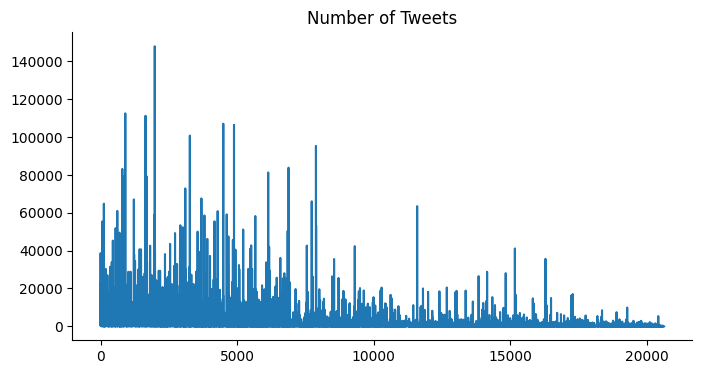

In [ ]:
# @title Number of Tweets

from matplotlib import pyplot as plt
df_polluters['Number of Tweets'].plot(kind='line', figsize=(8, 4), title='Number of Tweets')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_polluters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20645 entries, 0 to 20644
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   UserID                            20645 non-null  int64         
 1   Tweet                             20645 non-null  object        
 2   Created at                        20645 non-null  datetime64[ns]
 3   Collected at                      20645 non-null  datetime64[ns]
 4   Number of followings              20645 non-null  int64         
 5   Number of followers               20645 non-null  int64         
 6   Number of Tweets                  20645 non-null  int64         
 7   Length of Screen Name             20645 non-null  int64         
 8   LengthOfDescriptionInUserProfile  20645 non-null  int64         
 9   UserType                          20645 non-null  object        
 10  Series of number of Following     20645 non-nu

Concatenation of legitimate users' dataframes

,Account Age
3388,250
17448,14
21992,4
22185,0
4556,262
6047,236
14600,164
14080,20
13659,2
20329,65


In [ ]:
df_users.isnull().sum()

,0
UserID,0
Created at,0
Collected at,0
Number of followings,0
Number of followers,0
Number of Tweets,0
Length of Screen Name,0
LengthOfDescriptionInUserProfile,0
UserType,0
Account Age,0


In [ ]:
df_users.head()

,UserID,Created at,Collected at,Number of followings,Number of followers,Number of Tweets,Length of Screen Name,LengthOfDescriptionInUserProfile,UserType,Account Age
0,6301,2006-09-18 01:07:50,2010-01-17 20:38:25,3269,3071,861,8,132,Polluter,1217
1,10836,2006-10-27 14:38:04,2010-06-18 03:35:34,1949,793,226,9,134,Polluter,1329
2,10997,2006-10-29 09:50:38,2010-04-24 01:12:40,1119,9644,38674,12,158,Polluter,1272
3,633293,2007-01-14 12:40:10,2010-01-24 11:59:38,2174,6029,12718,11,121,Polluter,1105
4,717883,2007-01-27 22:14:18,2010-02-06 06:25:58,7731,7029,873,6,70,Polluter,1105


In [ ]:
df_users['UserType'].value_counts()

,count
UserType,
Polluter,22223
Legitimate,19232


In [ ]:
df_following = pd.concat([df_polluter_following, df_legitimate_following], axis = 0)
print(f"Shape(Users Following): {df_following.shape}")
print(f"Shape(Legitimate Following): {df_legitimate_following.shape}")
print(f"Shape(Polluter Following): {df_polluter_following.shape}")
print(f"Unique Users: {df_following['UserID'].nunique()}")
df_following = df_following.drop_duplicates(subset = ['UserID'])
print(f"Unique Users after removing duplicates: {df_following['UserID'].nunique()}")

Shape(Users Following): (41499, 2)
Shape(Legitimate Following): (19276, 2)
Shape(Polluter Following): (22223, 2)
Unique Users: 41455
Unique Users after removing duplicates: 41455


In [ ]:
df_following.isnull().sum()

,0
UserID,0
Series of number of Following,0


In [ ]:
df_following.head()

,UserID,Series of number of Following
0,6301,"3269,3310,3339,3381,3351,3323,3305,3275,3245,3..."
1,10836,"1949,1963,1963,1963,1963,1963,1963,1962,1961,1..."
2,10997,"1119,1119,999,999,1050,1170,1071,799,799,799,8..."
3,633293,"2174,2651,2676,2674,2673,2673,2673,2672,2672,2..."
4,717883,"7731,7737,7737,7741,7741,7741,7740,7740,7749,7..."


In [ ]:
df_tweets = pd.concat([df_polluters_tweets, df_legitimate_tweets], axis = 0)
print(f"Shape(Tweets): {df_tweets.shape}")
print(f"Shape(Legitimate Tweets): {df_legitimate_tweets.shape}")
print(f"Shape(Polluters Tweets): {df_polluters_tweets.shape}")
print(f"Unique Users: {df_tweets['UserID'].nunique()}")
print(f"Unique Tweet IDs: {df_tweets['TweetID'].nunique()}")
# df_tweets = df_tweets.drop_duplicates(subset = ['TweetID'])
# print(f"Unique Users after removing duplicates: {df_tweets['UserID'].nunique()}")
df_tweets.sample(n = 10)

Shape(Tweets): (5580068, 4)
Shape(Legitimate Tweets): (3246377, 4)
Shape(Polluters Tweets): (2333691, 4)
Unique Users: 39853
Unique Tweet IDs: 5579357


,UserID,TweetID,Tweet,CreatedAt
1787125,112983383,17323562507,Hhhhaaa..yg pnting jgn mabok cinta aj sya :DRT...,2010-06-29 05:49:36
265575,14710181,3241764559,台風が通り過ぎて、だいぶ良い天気になってきた。関東地方はほとんど空振りで終わってしまった感じ...,2009-08-11 02:13:17
1194274,28017500,5368825935,Yawwwwwwnnnnn.,2009-11-02 12:03:13
2347885,58401262,5991555851,acabeeei de assistir garota infernal *-* botei...,2009-11-23 17:38:03
351395,22333810,7357219976,@ryanbiddulph What kinds of marketing do you d...,2010-01-03 23:19:03
2072241,50058366,5967495530,@daliaKC OKAY I WASTALKIN BOUT THE BLACK PEOPL...,2009-11-22 22:28:36
170552,17206282,5299195672,[BSV] The Great Battle of 1211 - West Berlin G...,2009-10-30 17:11:13
1070007,75553897,11876367186,Tes http://myloc.me/5Ocgc,2010-04-09 06:51:20
1665684,39472625,5557081574,Ngeliat vc st12 jd inget karaoke st12 di bis p...,2009-11-09 06:12:13
1286265,29910923,6074461729,@Noel_Adarfio Erga si! Por eso yo siempre esto...,2009-11-26 00:27:45


In [ ]:
df_tweets.isnull().sum()
df_tweets = df_tweets.dropna()
df_tweets.isnull().sum()

,0
UserID,0
TweetID,0
Tweet,0
CreatedAt,0


In [ ]:
df_merged = df_users.merge(df_following, on = "UserID", how = "left")
print(df_merged.shape)
df = df_merged.merge(df_tweets, on = "UserID", how = "left")
df.shape

(41455, 11)


(5581662, 14)

In [ ]:
# Git commit
# !git add .
# !git status
# !git commit - m "Git through colab, merge changes"
# !git push origin main

In [ ]:
# !git add Twitter_User_Analysis.ipynb


In [ ]:
# !git config user.email "rohitkhadka153@gmail.com"
# !git config user.name "Rohit Khadka"

In [ ]:
# !git commit -m "Updated Twitter_User_Analysis.ipynb"
# !git push origin main

In [ ]:
df.sample(n=10)

,UserID,Created at,Collected at,Number of followings,Number of followers,Number of Tweets,Length of Screen Name,LengthOfDescriptionInUserProfile,UserType,Account Age,Series of number of Following,TweetID,Tweet,CreatedAt
1473260,96524526,2009-12-13 04:10:09,2010-01-28 07:05:13,184,421,3549,13,0,Polluter,46,"184,185,185,185,186,187,187,188,188,189,189,19...",8.311347e+09,:P profits tax Tax Help for Small Business Owners,2010-01-27 23:30:15
957256,66779080,2009-08-18 14:47:10,2010-01-12 23:12:02,4301,4141,427,10,156,Polluter,147,"4301,4301,4302,4302,4302,4302,4302,4302,4302,4...",6.850312e+09,Xmas besiko: Free report - Yoga Retreats http:...,2009-12-19 22:15:19
5042408,69560335,2009-08-28 05:55:28,2009-11-16 08:01:09,76,53,2792,11,42,Legitimate,80,"240,240,240,240,240,240,241,243,243,243,243,24...",5.728175e+09,だるいから寝るしかない、おやすみ,2009-11-14 22:32:09
485843,30496611,2009-04-11 13:31:28,2010-01-01 04:49:55,3363,3060,1654,13,30,Polluter,264,"3363,3363,3363,3363,3363,3363,3363,3363,3367,3...",7.155650e+09,Stock futures point to extended Xmas rally (...,2009-12-29 04:20:56
5379091,82061902,2009-10-13 05:27:31,2009-11-22 09:08:24,18,114,269,13,59,Legitimate,40,"59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,5...",5.475918e+09,"PAK v NZ NZ: 1/0 (0.3) BB McCullum: 1, AJ Redm...",2009-11-06 05:03:01
1549507,99698976,2009-12-27 06:25:28,2010-01-08 05:04:13,636,229,1556,14,142,Polluter,11,"636,636,636,636,636,636,635,635,635,635,635,63...",7.472110e+09,Marquette hands Georgetown first Big East loss...,2010-01-07 02:00:47
4599404,55702487,2009-07-10 18:54:53,2009-11-13 18:56:38,99,117,822,11,0,Legitimate,126,"128,128,128,128,128,128,128,128,128,129,129,12...",5.075985e+09,"eu queria poder passar um dia intero , olhando...",2009-10-22 13:34:56
4531928,53609170,2009-07-04 01:00:01,2009-11-20 14:18:31,27,22,153,12,19,Legitimate,139,"29,29,29,29,29,29,29,29,29,29,29,29,29,30,30,3...",4.167357e+09,@allysonfelix I am so happy that you are enjo...,2009-09-22 02:17:58
2666590,15282037,2008-06-30 15:41:17,2009-11-17 04:22:58,0,56,2742,11,0,Legitimate,504,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",4.984713e+09,LibaUudised 2009.10.19 http://tinyurl.com/ykgh2hf,2009-10-19 00:59:01
3059615,19789028,2009-01-30 15:15:33,2009-11-23 11:28:53,284,180,2553,14,90,Legitimate,296,"358,358,358,358,358,358,358,358,358,358,358,35...",5.779699e+09,@alinedangelo E você?? Não te vejo desde quint...,2009-11-16 17:37:20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5581662 entries, 0 to 5581661
Data columns (total 14 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   UserID                            int64         
 1   Created at                        datetime64[ns]
 2   Collected at                      datetime64[ns]
 3   Number of followings              int64         
 4   Number of followers               int64         
 5   Number of Tweets                  int64         
 6   Length of Screen Name             int64         
 7   LengthOfDescriptionInUserProfile  int64         
 8   UserType                          object        
 9   Account Age                       int64         
 10  Series of number of Following     object        
 11  TweetID                           float64       
 12  Tweet                             object        
 13  CreatedAt                         object        
dtypes: datetime64[ns](

In [ ]:
uniqueIDs = df['UserID'].nunique()
uniqueIDs

41455

In [ ]:
df.nunique()

,0
UserID,41455
Created at,41429
Collected at,41346
Number of followings,5446
Number of followers,5578
Number of Tweets,7417
Length of Screen Name,14
LengthOfDescriptionInUserProfile,181
UserType,2
Account Age,1074


In [ ]:
df.isnull().sum()

,0
UserID,0
Created at,0
Collected at,0
Number of followings,0
Number of followers,0
Number of Tweets,0
Length of Screen Name,0
LengthOfDescriptionInUserProfile,0
UserType,0
Account Age,0


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
UserID,0
Created at,0
Collected at,0
Number of followings,0
Number of followers,0
Number of Tweets,0
Length of Screen Name,0
LengthOfDescriptionInUserProfile,0
UserType,0
Account Age,0


In [ ]:
df["Created at"] = pd.to_datetime(df["Created at"])
df["Collected at"] = pd.to_datetime(df["Collected at"])
df["Account Age"] = df["Collected at"] - df["Created at"]
#In days
df["Account Age"] = df["Account Age"].dt.days
df["Account Age"].sample(n = 10)

,Account Age
949533,200
4701782,119
1322229,84
1123632,166
4244401,172
5152070,72
123921,533
641446,348
4187242,168
3475442,231


In [ ]:
X = df.drop(columns = ["CreatedAt", "UserType", "UserID", "Created at", "Collected at"])
X.sample(n = 10)

,Number of followings,Number of followers,Number of Tweets,Length of Screen Name,LengthOfDescriptionInUserProfile,Account Age,Series of number of Following,TweetID,Tweet
57453,10232,9307,595,12,147,628,"10232,10248,10257,10260,10247,10229,10205,1019...",5.514966e+09,@quantum9mystic Even working w/ subtle energy ...
167816,10830,14400,2977,15,157,428,"10830,10840,10840,10828,10828,10840,10843,1084...",6.288204e+09,Why Off Page SEO Is So Important | Attraction ...
643530,1240,665,1129,10,57,272,"1240,1240,1239,1239,1238,1238,1238,1244,1244,1...",8.705943e+09,How Much Can You Expect To Make? http://linkbe...
4969257,69,258,1863,12,34,101,"591,592,592,592,592,592,592,592,592,592,592,60...",5.984579e+09,It's gonna be a barn burner
4823360,71,145,2938,11,0,101,"116,115,115,115,115,115,115,115,115,115,115,11...",5.621145e+09,#celebrityperfumes : Me Mic! by Taylor Swift..
795088,1677,905,123,13,72,257,"1677,1677,1725,1725,1725,1677,1677,1676,1676,1...",9.717610e+09,rjo conference today scottsdale az
1513247,1934,627,1276,14,75,206,"1934,2001,1803,1803,1803,1803,1803,1803,1958,1...",1.699896e+10,Pattern for dog bed? http://linkee.com/MKB
4382941,129,223,4039,13,75,149,"177,177,177,177,177,177,177,177,176,176,176,17...",5.676717e+09,@ElenaChime good morning
3943829,1088,1134,17959,8,25,193,"357,358,358,358,358,358,358,358,359,359,359,35...",5.724743e+09,@thiiemy hduashdsau ele é como se fosse um @st...
979444,12765,12246,4504,11,150,170,"12765,12764,12761,12775,12773,12776,12804,1280...",8.860914e+09,1000 Twitter Followers in 30 Days: How i did i...


In [ ]:
y = df['UserType']
y.sample(n = 10)

,UserType
2552922,Legitimate
5481072,Legitimate
58151,Polluter
2230225,Polluter
5454483,Legitimate
4256618,Legitimate
5471923,Legitimate
555227,Polluter
3743156,Legitimate
80228,Polluter


In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=2de3837b4aaf3f1962e6a21c8574d0b52d4aaf40b7b8bb137a366c54e89bf597
  Stored in directory: /root/.cache/pip/wheels/81/f2/e0/d578821d723b473d18610ea93810e4a5402463919f07e603d9
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

In [ ]:
#import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from googletrans import Translator
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import re


In [ ]:
Translator = Translator()
df['Tweet'] = df['Tweet'].apply(lambda x: Translator.translate(x, dest = 'en').text)
df['Tweet'].sample(n = 10)
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

KeyboardInterrupt: 